In [45]:
import pandas as pd
import numpy as np
X_submit = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/11__Stack/03__Ensemble/0902_2108/model_level_probas_is_submit.csv", index_col=0)
X_pretrain = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/11__Stack/03__Ensemble/0902_2023/model_level_probas.csv", index_col=0)
y_pretrain = pd.read_csv("../output/11__Stack/03__Ensemble/0902_2023/y_test.csv", index_col=0)

32439

In [59]:
from sklearn.metrics import f1_score

X_bin = (X_pretrain>0.5).astype(int)

scores = {
    col: f1_score(
        X_bin[col], y_pretrain
    ) for col in X_bin.columns
}

In [55]:
bin(32)[2:].zfill(9)

'000100000'

In [71]:
scores

num_cols = len(X_pretrain.columns)
n_max = 2**num_cols
scores_selected = []
for i in range(n_max):
    i_bin = bin(i)[2:].zfill(num_cols)
    cols_selected = np.array(X_pretrain.columns)[
        [j for j in range(num_cols) if i_bin[j] == "1"]
    ]

    # ナイーブ
    # w = np.array([scores[col] for col in cols_selected])
    w = np.ones(len(cols_selected))
    X_weighted = (X_pretrain[cols_selected].dot(w/sum(w))>0.5).astype(int)

    scores_selected.append(f1_score(
        X_weighted, y_pretrain
    ))




In [72]:

i_bin = [bin(i)[2:].zfill(num_cols) for i in range(n_max)]
cols = [
        [X_pretrain.columns[j] for j in range(num_cols) if i_bin_[j] == "1"] for i_bin_ in i_bin
    ]

df_result = pd.DataFrame(
    {
        "i_bin": i_bin,
        "models": cols,
        "scores": scores_selected
    }
)

In [94]:
from sklearn.model_selection import KFold
for top_k in [1, 3, 5, 10, 20]:

    df_result_sorted = df_result.sort_values("scores", ascending=False).reset_index(drop=True)
    df_result_sorted.head()["models"].tolist()

    from collections import defaultdict
    adict = {
        k: 0 for k in X_pretrain.columns
    }
    for models_v in df_result_sorted.loc[:top_k, "models"]:
        for v in models_v:
            adict[v]+=1

    new_w = np.array(list(adict.values()))
    new_w = new_w / sum(new_w)

    y_pred_tmp, y_true_tmp = (X_pretrain.dot(new_w)>0.5).astype(int).copy(), y_pretrain.copy()

    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    scores_tmp = []
    for idx, _ in cv.split(y_pred_tmp):
        scores_tmp.append(
            f1_score(
                y_pred_tmp.iloc[idx], y_true_tmp.iloc[idx]
            )
        )

    print(
        scores_tmp, np.mean(scores_tmp)
    )

[0.5973243340966614, 0.6070492974517743, 0.6115897556945592] 0.6053211290809983
[0.5971231717635682, 0.6064870021464346, 0.6116171773334911] 0.6050757837478312
[0.5967625030200532, 0.6067254948724063, 0.6116367076631978] 0.6050415685185525
[0.5971953578336557, 0.6069212410501194, 0.6112556159848664] 0.6051240716228805
[0.596042471042471, 0.6057210965435041, 0.6108223062381852] 0.6041952912747202


['MLP_PyT_emb',
 'XGBoost',
 'LightGBM_GBDT',
 'LightGBM_DART',
 'MLP_PyT_simple',
 'RealMLP']

In [121]:
X_submit = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/11__Stack/03__Ensemble/0902_2154/model_level_probas_is_submit.csv", index_col=0)
models_selected = df_result_sorted["models"].iloc[0]
y_submit_1 = (X_submit[models_selected].mean(axis=1)>0.5).astype(int)
np.save(
    "tmp",
    y_submit_1.values
)

In [ ]:
# y_submit_1 と片方、結果はどれくらい違うのか？？
y_submit_2 = pd.read_csv("../output/99_Submision/0902_2305__submit.csv", index_col=0, header=None)
y_submit_2

,1
0,
test_00000,1
test_00001,0
test_00002,0
test_00003,1
test_00004,0
...,...
test_32434,1
test_32435,1
test_32436,1


In [ ]:
# ラストは直近の結果の平均でも提出するか
import json
with open("/Users/henmi_note/Desktop/signate2/output/99_Submision/000__memo.json", "r") as f:
    memo = json.load(f)

date_list = [
    '0804_2053',
    '0807_0129',
    '0813_0134',
    '0819_1724',
    '0819_1950',
    '0820_1501',
    '0821_1904',
    '0821_1907',
    '0821_1928',
    '0821_1929',
    '0822_1851',
    '0825_2227',
    '0826_0214',
    '0826_1524',
    '0827_0127',
    '0828_2133',
    '0829_1453',
    '0829_1458',
    '0901_1309',
    '0901_1311',
    '0901_1737',
    '0901_1745',
    '0902_1006',
    '0902_2137',
    '0902_2305',
    '0902_2312'
    ]

['0804_2053',
 '0807_0129',
 '0813_0134',
 '0819_1724',
 '0819_1950',
 '0820_1501',
 '0821_1904',
 '0821_1907',
 '0821_1928',
 '0821_1929',
 '0822_1851',
 '0825_2227',
 '0826_0214',
 '0826_1524',
 '0827_0127',
 '0828_2133',
 '0829_1453',
 '0829_1458',
 '0901_1309',
 '0901_1311',
 '0901_1737',
 '0901_1745',
 '0902_1006',
 '0902_2137',
 '0902_2305',
 '0902_2312']

In [126]:
memo

{'0804_2053': '最初の提出。特徴量はgoal(log), 時刻系特徴量の差分、通貨・国籍のワンホットエンコーディング',
 '0807_0129': 'xgboos、不均衡重み処理、テキスト処理なし、numericalデータのスケーリングなし、モデルのハイパラなし',
 '0813_0134': 'desc のトークン化＋主成分抽出データをテーブルに追加、XGBoost',
 '0819_1724': '成分（テキスト由来）100成分＋n_estimator=100の軽量lightGBM',
 '0819_1950': 'スタッキングモデル lightGBM, XGBoost,ベースモデル群+XGBoost のメタモデル',
 '0820_1501': 'HPTの結果を反映てスタッキングモデを設計',
 '0821_1904': 'テーブルデータ向けモ学習・予測。不均衡データ対策にランダムダウンサンプリングを採用。詳細はnote/n04.ipynb',
 '0821_1907': 'テーブルデータ向けモデルで学習・予測。不均衡データ対策にランダムダウンサンプリングを採用。詳細はnote/n04.ipynb',
 '0821_1928': 'テーブルデータ向けモデルで学習・予測。不均衡データ対策にランダムダウンサンプリングを採用。詳細はnote/n04.ipynb',
 '0821_1929': 'テーブルデータ向けモデルで学習・予測。不均衡データ対策にランダムダウンサンプリングを採用。詳細はnote/n04.ipynb',
 '0822_1851': 'ヤケクソ',
 '0825_2227': 'descのジャンル別モデルをスタッキングに追加。また、テキストベクトルを主成分化前のまま利用',
 '0826_0214': '新しいライブラリ',
 '0826_1524': 'k近傍法モデルをベースモデルに追加。スタッキングプロセスをOOFに準拠',
 '0827_0127': 'モデル由来のメタ特徴量をF1スコアの加重変更、メタモデル予測をOOF予測に変更',
 '0828_2133': '新規スタッキング。RealMLP, 特徴量サンプリングロジスティックモデル、Pytorchニューラルネットワーク',
 '0829_1453': 'メタモデルのマルチ

In [184]:
select_date = [
    "0901_1311", "0901_1737", "0901_1745", "0902_1006", "0902_2137", "0902_2305", "0902_2312"
]

pathes = [
    f"../output/99_Submision/{date}__submit.csv" for date in select_date
]

df_merge = pd.DataFrame()
for date, path in zip(
    select_date, pathes
):
    df_tmp = pd.read_csv(path, index_col=0, header=None).rename(
        {1: date}, axis="columns"
    )
    df_merge = pd.concat(
        [df_merge, df_tmp], axis="columns"
    )
df_merge.head()

,0901_1311,0901_1737,0901_1745,0902_1006,0902_2137,0902_2305,0902_2312
0,,,,,,,
test_00000,1,1,1,1,1,1,1
test_00001,0,0,0,0,0,0,0
test_00002,0,0,0,0,0,0,0
test_00003,1,1,1,1,1,1,1
test_00004,0,0,0,0,0,0,0


In [185]:
weights = [
    0.5995921142080217,
    0.6018837583275902,
    0.6027649769585253,
    0.5981435363368803,
    0.5990803915752002,
    0.5995508982035928,
    0.6012563565659587
]
weights = np.array(weights)
weights = np.array(weights) / sum(weights)
print(weights)

df_merge_new = df_merge.dot(weights).round().astype(int)


[0.14268284 0.14322818 0.14343788 0.14233813 0.14256107 0.14267303
 0.14307888]


In [181]:
df_merge_cp = df_merge.copy()
df_merge_cp["final"] = df_merge_new.values
df_merge_cp.corr()

,0829_1453,0829_1458,0901_1311,0901_1737,0901_1745,0902_1006,0902_2137,0902_2305,0902_2312,final
0829_1453,1.000000,0.964363,0.890047,0.873122,0.860700,0.875143,0.874446,0.884301,0.871064,0.918881
0829_1458,0.964363,1.000000,0.880436,0.863792,0.851929,0.866504,0.866241,0.877349,0.864134,0.910101
0901_1311,0.890047,0.880436,1.000000,0.902359,0.888161,0.904672,0.910323,0.898494,0.878003,0.936430
0901_1737,0.873122,0.863792,0.902359,1.000000,0.967415,0.899188,0.895802,0.893067,0.875122,0.936037
0901_1745,0.860700,0.851929,0.888161,0.967415,1.000000,0.886478,0.884829,0.882154,0.869011,0.922968
0902_1006,0.875143,0.866504,0.904672,0.899188,0.886478,1.000000,0.897460,0.892556,0.876260,0.926563
0902_2137,0.874446,0.866241,0.910323,0.895802,0.884829,0.897460,1.000000,0.913376,0.895636,0.934011
0902_2305,0.884301,0.877349,0.898494,0.893067,0.882154,0.892556,0.913376,1.000000,0.967447,0.944279
0902_2312,0.871064,0.864134,0.878003,0.875122,0.869011,0.876260,0.895636,0.967447,1.000000,0.924408
final,0.918881,0.910101,0.936430,0.936037,0.922968,0.926563,0.934011,0.944279,0.924408,1.000000


In [182]:
df_merge_new

0
test_00000    1
test_00001    0
test_00002    0
test_00003    1
test_00004    0
             ..
test_32434    1
test_32435    1
test_32436    1
test_32437    0
test_32438    0
Length: 32439, dtype: int64

In [186]:
df_merge_new.to_csv("../output/99_Submision/0902_2340__submit.csv", header=None)

0.6051754246705826


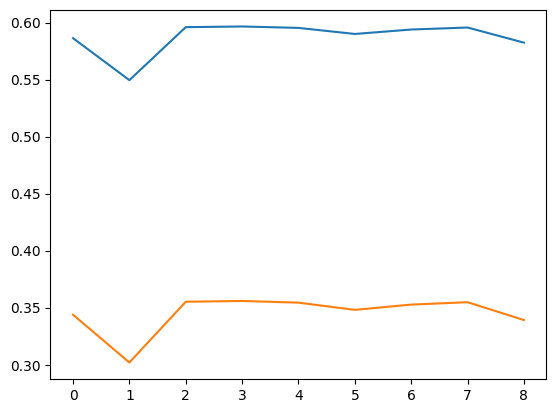

In [41]:
# 重みを二乗して、いい感じのやつほど強調されるように
import matplotlib.pyplot as plt


w = np.array(list(scores.values()))
plt.plot(w)

w = w**2
plt.plot(w)
X_weighted = X.dot(w/sum(w))

print(f1_score(
    (X_weighted>0.5).astype(int), y
))

In [8]:
## テスト予測値のうち、確信度が大きなデータをtrainデータに加えて、新規データを作成する

class F01_tmp():
    def __init__(self):
        self.threshold_pos = 0.75
        self.threshold_neg = 0.10

    def f01__get__data(self, data_train=None, data_test=None):
        self.data_submit = pd.read_csv("../output/07__Stack/03__Ensemble/0901_1240/model_level_probas_is_submit.csv", index_col=0)

        if isinstance(data_train, pd.DataFrame):
            self.data_train = data_train
        else:
            self.data_train = pd.read_csv("../output/05__01__SentenceTransformer_Raw/train.csv")
        if isinstance(data_test, pd.DataFrame):
            self.data_test = data_test
        else:
            self.data_test = pd.read_csv("../output/05__01__SentenceTransformer_Raw/test.csv")

    def f02__get_shift(self, data_submit_mean=None):
        if isinstance(data_submit_mean, pd.Series):
            pass
        else:
            data_submit_mean = self.data_submit.mean(axis=1)

        data_shift = data_submit_mean[np.logical_or(
            data_submit_mean < self.threshold_neg,
            data_submit_mean > self.threshold_pos
        )]

        self.shift_index = data_shift.index
        self.shift_label = (data_shift>0.5).astype(int)

        self.data_test_shift = self.data_test.iloc[self.shift_index]
        self.data_test_shift.loc[:, "final_status"] = self.shift_label.values

    def f03__save(self):
        self.data_train_shift = pd.concat(
            [self.data_train, self.data_test_shift], axis="index"
        ).reset_index(drop=True)
        # self.data_train.to_csv("../output/10__ShiftTest/train.csv")
        return self.data_train_shift

In [3]:
data = pd.read_csv("/Users/henmi_note/Desktop/signate2/output/05__01__SentenceTransformer_Raw/train.csv",)

from sklearn.model_selection import  train_test_split
X = data.drop("final_status", axis="columns")
y = data["final_status"]
dataset = {
    k: data for k, data in zip(
        ["X_train", "X_val", "y_train", "y_val"], train_test_split(X, y, stratify=y)
    )
}

In [4]:
target_col = "final_status"
data_train, data_val_test = train_test_split(data, test_size=0.4, stratify=data[target_col])
data_val, data_test = train_test_split(data_val_test, test_size=0.5, stratify=data_val_test[target_col])
y_val = data_val["final_status"]
X_val = data_val.drop("final_status", axis="columns")
y_test = data_test["final_status"]
X_test = data_test.drop("final_status", axis="columns")

In [ ]:
    # --- 擬似ラベル作成（0/1 に丸め） ---
    pseudo_X = pool.iloc[take_idx].copy()
    pseudo_y = (proba_pool[take_idx] >= 0.5).astype(int)
    pseudo_df = pseudo_X.copy()
    pseudo_df[TARGET] = pseudo_y

    # ======== 擬似ラベルの正しさを検証 ========
    # もし pool が「ラベルを隠しただけの既知データ」であれば
    # 元の data_val (正解ラベル付き) と比較できる
    true_labels = data_val.iloc[take_idx][TARGET]   # 真のラベル
    f1_pseudo = f1_score(true_labels, pseudo_y)    # 擬似ラベル vs 正解
    print(f"[SelfTrain step {step}] pseudo-label F1={f1_pseudo:.4f}")

    # --- 学習集合に追加 & プールから除去 ---
    train_df = pd.concat([train_df, pseudo_df], axis=0, ignore_index=True)
    pool = pool.drop(pool.index[take_idx]).reset_index(drop=True)


[Baseline]  VAL  F1=0.5763, AUC=0.7532
[Baseline]  TEST F1=0.5732, AUC=0.7523
[SelfTrain step 1] val_f1=0.5763, pick_pos=1051, pick_neg=1020, pick_total=2071
[SelfTrain step 2] val_f1=0.5804, pick_pos=521, pick_neg=73, pick_total=594
[SelfTrain step 3] val_f1=0.5707, pick_pos=293, pick_neg=31, pick_total=324
[SelfTrain step 4] val_f1=0.5702, pick_pos=211, pick_neg=36, pick_total=247
[SelfTrain] early stop by patience at step 4
[SelfTrain] VAL  F1=0.5702, AUC=0.7523
[SelfTrain] TEST F1=0.5733, AUC=0.7529

=== COMPARISON (Test set) ===
Baseline : F1=0.5732, AUC=0.7523, Prec=0.4955, Rec=0.6800
SelfTrain: F1=0.5733, AUC=0.7529, Prec=0.5021, Rec=0.6680


In [ ]:
# 確信度と正解率に相関はある？？
model = LGBMClassifier(**params)


[867, 881, 892, 918, 932]

In [ ]:
from xgboost import XGBClassifier

In [300]:
# モデル再学習
from lightgbm import LGBMClassifier
params = {
        "n_estimators": 200,
        "num_leaves": 32,
        "boosting_type": "dart",
        "reg_alpha": 10,
        "reg_lambda": 0,
        "max_depth": 10,
        "drop_seed": 42,
        "is_unbalance": True,
        "verbosity": -1
      }
model = LGBMClassifier(**params)
target_col = "final_status"
X, y = data_train_shift.drop(target_col, axis="columns"), data_train_shift[target_col]
model.fit(X, y)
y_pred_after_shift = model.predict(X_test)

from sklearn.metrics import f1_score
print(
    f1_score(y_pred_after_shift, y_test)
)

0.5695553500882575


In [305]:
pd.read_csv("/Users/henmi_note/Desktop/signate2/output/07__Stack/02__MetaFeats_train.csv")

,Unnamed: 0,LightGBM_tmp_1__proba_pos
0,0,0.386713
1,1,0.118321
2,2,0.520234
3,3,0.365362
4,4,0.521869
...,...,...
60547,60547,0.477195
60548,60548,0.452433
60549,60549,0.489123
60550,60550,0.514921


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_fscore_support
from lightgbm import LGBMClassifier

# =========================================================
# 設定
# =========================================================
TARGET = "final_status"
RANDOM_STATE = 42

# 擬似ラベルの確信度しきい値
TH_POS = [0.75, 0.8, 0.85, 0.9, 0.95]      # Positive とみなす下限
TH_NEG = 0.05      # Negative とみなす上限
NEG_POS_RATIO = 5 # ネガポジ比率

# 学習時の二値化しきい値（評価用）
THRESH_PRED = 0.5

# 反復回数と早期停止
MAX_STEPS = 5
PATIENCE = 2  # 検証F1が改善しない反復が続いたら停止

# LGBM ハイパーパラメータ
lgbm_params = dict(
    n_estimators=200,
    num_leaves=32,
    boosting_type="gbdt",  # まずは安定な gbdt
    reg_alpha=10,
    reg_lambda=0,
    max_depth=10,
    is_unbalance=True,
    random_state=RANDOM_STATE,
    verbosity=-1,
)

# =========================================================
# データ分割: train / val / pool / test
#   - pool は未ラベル集合を想定（ここでは例として val のコピーを使用し、答え合わせ用に真ラベルも保持）
# =========================================================
# data は TARGET を含む DataFrame を前提
data_tr, data_tmp = train_test_split(
    data, test_size=0.4, stratify=data[TARGET], random_state=RANDOM_STATE
)
data_val, data_te = train_test_split(
    data_tmp, test_size=0.5, stratify=data_tmp[TARGET], random_state=RANDOM_STATE
)

X_val = data_val.drop(columns=[TARGET]).copy()
y_val = data_val[TARGET].copy()

X_test = data_te.drop(columns=[TARGET]).copy()
y_test = data_te[TARGET].copy()

# 「未ラベルプール」：特徴量のみ（学習に使う用）
pool = data_val.drop(columns=[TARGET]).copy()
# 「答え合わせ用プール」：真のラベルつき（F1計測用、検証用セットとは独立コピー）
pool_full = data_val.copy()

# =========================================================
# ① ベースライン（擬似ラベルなし）
# =========================================================
baseline_tr = data_tr.copy()
Xb, yb = baseline_tr.drop(columns=[TARGET]), baseline_tr[TARGET]

baseline_model = LGBMClassifier(**lgbm_params)
baseline_model.fit(Xb, yb)

# 検証
val_proba_base = baseline_model.predict_proba(X_val)[:, 1]
val_pred_base = (val_proba_base >= THRESH_PRED).astype(int)
val_f1_base = f1_score(y_val, val_pred_base)
val_auc_base = roc_auc_score(y_val, val_proba_base)

# テスト
test_proba_base = baseline_model.predict_proba(X_test)[:, 1]
test_pred_base = (test_proba_base >= THRESH_PRED).astype(int)
test_f1_base = f1_score(y_test, test_pred_base)
test_auc_base = roc_auc_score(y_test, test_proba_base)

print(f"[Baseline]  VAL  F1={val_f1_base:.4f}, AUC={val_auc_base:.4f}")
print(f"[Baseline]  TEST F1={test_f1_base:.4f}, AUC={test_auc_base:.4f}")

# =========================================================
# ② 自己学習（擬似ラベル追加）
#   条件: negative の件数は positive の 2 倍以下に制限
#   かつ、各ステップで擬似ラベルの F1（真ラベルと比較）を出力
# =========================================================
train_df = data_tr.copy()

best_val_f1 = -np.inf
no_improve_rounds = 0

for step in range(1, MAX_STEPS + 1):
    # --- 学習 ---
    model = LGBMClassifier(**lgbm_params)
    Xtr, ytr = train_df.drop(columns=[TARGET]), train_df[TARGET]
    model.fit(Xtr, ytr)

    # --- 検証スコア ---
    proba_val = model.predict_proba(X_val)[:, 1]
    pred_val = (proba_val >= THRESH_PRED).astype(int)
    val_f1 = f1_score(y_val, pred_val)

    # --- 未ラベルプールが空なら停止 ---
    if len(pool) == 0:
        print(f"[SelfTrain step {step}] pool empty → stop")
        break

    # --- プールの確率 ---
    proba_pool = model.predict_proba(pool)[:, 1]

    # 高信頼 Positive / Negative 候補
    mask_pos = proba_pool >= TH_POS[step]
    mask_neg = proba_pool <= TH_NEG

    pos_idx = np.where(mask_pos)[0]
    neg_idx = np.where(mask_neg)[0]

    # ===== 件数制限 =====
    # negative の件数は positive の 2 倍以下
    n_pos = len(pos_idx)
    if n_pos == 0:
        # positive が 0 件なら negative も 0（= 追加しない）
        neg_idx = np.array([], dtype=int)
    else:
        n_neg_allowed = NEG_POS_RATIO * n_pos
        if len(neg_idx) > n_neg_allowed:
            # 負例は確信度がより高い順（proba が低い順）に選別
            neg_sorted = neg_idx[np.argsort(proba_pool[neg_idx])]  # 低い順
            neg_idx = neg_sorted[:n_neg_allowed]

    take_idx = np.concatenate([pos_idx, neg_idx])

    # --- 取り込むサンプルがない場合は停止 ---
    if len(take_idx) == 0:
        print(
            f"[SelfTrain step {step}] val_f1={val_f1:.4f}, pick_pos=0, pick_neg=0, pick_total=0 → stop"
        )
        break

    # --- 擬似ラベル作成（0/1 に丸め） ---
    pseudo_X = pool.iloc[take_idx].copy()
    pseudo_y = (proba_pool[take_idx] >= 0.5).astype(int)

    # ======== 擬似ラベルの正しさを検証（pool_full の真ラベルで答え合わせ） ========
    true_labels = pool_full.iloc[take_idx][TARGET].values
    f1_pseudo = f1_score(true_labels, pseudo_y)
    print(
        f"[SelfTrain step {step}] val_f1={val_f1:.4f}, "
        f"pick_pos={len(pos_idx)}, pick_neg={len(neg_idx)}, pick_total={len(take_idx)}, "
        f"pseudo-label F1={f1_pseudo:.4f}"
    )

    # --- 早期停止（検証F1） ---
    if val_f1 > best_val_f1 + 1e-6:
        best_val_f1 = val_f1
        no_improve_rounds = 0
    else:
        no_improve_rounds += 1
        if no_improve_rounds >= PATIENCE:
            print(f"[SelfTrain] early stop by patience at step {step}")
            # 早期停止するが、このステップの pickup は追加しないまま終了
            break

    # --- 学習集合に追加 ---
    pseudo_df = pseudo_X.copy()
    pseudo_df[TARGET] = pseudo_y
    train_df = pd.concat([train_df, pseudo_df], axis=0, ignore_index=True)

    # --- プールから除去（特徴量/真ラベルの両方を同期させて削除） ---
    pool = pool.drop(pool.index[take_idx]).reset_index(drop=True)
    pool_full = pool_full.drop(pool_full.index[take_idx]).reset_index(drop=True)

# --- 反復後の最終学習 ---
final_model = LGBMClassifier(**lgbm_params)
Xtr_f, ytr_f = train_df.drop(columns=[TARGET]), train_df[TARGET]
final_model.fit(Xtr_f, ytr_f)

# --- 検証スコア ---
val_proba_final = final_model.predict_proba(X_val)[:, 1]
val_pred_final = (val_proba_final >= THRESH_PRED).astype(int)
val_f1_final = f1_score(y_val, val_pred_final)
val_auc_final = roc_auc_score(y_val, val_proba_final)

# --- テストスコア ---
test_proba_final = final_model.predict_proba(X_test)[:, 1]
test_pred_final = (test_proba_final >= THRESH_PRED).astype(int)
test_f1_final = f1_score(y_test, test_pred_final)
test_auc_final = roc_auc_score(y_test, test_proba_final)

# 追加で詳細指標（適合率/再現率/F1）を確認
prec_base, rec_base, f1_base, _ = precision_recall_fscore_support(
    y_test, test_pred_base, average="binary", zero_division=0
)
prec_self, rec_self, f1_self, _ = precision_recall_fscore_support(
    y_test, test_pred_final, average="binary", zero_division=0
)

print(f"[SelfTrain] VAL  F1={val_f1_final:.4f}, AUC={val_auc_final:.4f}")
print(f"[SelfTrain] TEST F1={test_f1_final:.4f}, AUC={test_auc_final:.4f}")

print("\n=== COMPARISON (Test set) ===")
print(f"Baseline : F1={test_f1_base:.4f}, AUC={test_auc_base:.4f}, "
      f"Prec={prec_base:.4f}, Rec={rec_base:.4f}")
print(f"SelfTrain: F1={test_f1_final:.4f}, AUC={test_auc_final:.4f}, "
      f"Prec={prec_self:.4f}, Rec={rec_self:.4f}")

[Baseline]  VAL  F1=0.5763, AUC=0.7532
[Baseline]  TEST F1=0.5732, AUC=0.7523
[SelfTrain step 1] val_f1=0.5763, pick_pos=416, pick_neg=1020, pick_total=1436, pseudo-label F1=0.8665
[SelfTrain step 2] val_f1=0.5727, pick_pos=39, pick_neg=46, pick_total=85, pseudo-label F1=0.9600
[SelfTrain step 3] val_f1=0.5751, pick_pos=1, pick_neg=5, pick_total=6, pseudo-label F1=0.0000
[SelfTrain] early stop by patience at step 3
[SelfTrain] VAL  F1=0.5751, AUC=0.7509
[SelfTrain] TEST F1=0.5807, AUC=0.7511

=== COMPARISON (Test set) ===
Baseline : F1=0.5732, AUC=0.7523, Prec=0.4955, Rec=0.6800
SelfTrain: F1=0.5807, AUC=0.7511, Prec=0.5020, Rec=0.6889


In [65]:
data_cv = pd.read_csv("../output/05__SentenceTransformer/train.csv")
data_test = pd.read_csv("../output/05__SentenceTransformer/test.csv")

In [64]:
np.array([0.1, 0.51, 0.6]).round()

array([0., 1., 1.])

In [ ]:
# データ整理: CVデータとtestデータ
target_col = "final_status"
NEG_POS_RATIO = 4
threshold_pos = 0.8
threshold_neg = 0.1
PATIENCE = 2
NUM_STEPS = 10

# モデル設定など
params = dict(
    n_estimators=200,
    num_leaves=31,
    boosting_type="gbdt",
    max_depth=-1,
    learning_rate=0.05,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    is_unbalance=True,
    random_state=RANDOM_STATE,
    verbosity=-1,
)

score_old = 0
cnt = 0
cnt_len_data_add = 0

# ループ開始
## CVループ
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
is_add = pd.Series([False]*len(data_test))
data_add = pd.DataFrame()
len_data_add_old = 0

def split_X_y(data):
    return data.drop(target_col, axis="columns"), data[target_col]

for step in range(NUM_STEPS):
    y_cv_pred_proba = np.zeros(len(data_cv))
    y_test_pred_proba = np.zeros((len(data_test), 3))
    ### cv -> train, val
    X_cv, y_cv = split_X_y(data_cv)
    for i, (idx_train, idx_val) in enumerate(cv.split(X_cv, y_cv)):
    ### trainに擬似ラベルデータ追加
        data_train = data_cv.iloc[idx_train]
        data_val = data_cv.iloc[idx_val]
        data_train_with_giji = pd.concat(
            [data_train, data_add], axis="index"
        ).reset_index(drop=True)
        X_train, y_train = split_X_y(data_train_with_giji)
    ### trainで学習
        model = LGBMClassifier(**params)
        model.fit(X_train, y_train)
    ### val を予測、評価
        X_val, y_val = split_X_y(data_val)
        y_cv_pred_proba[idx_val] = model.predict_proba(X_val)[:, 1]
    ### test を予測、評価
        X_test, _ = split_X_y(data_test)
        y_test_pred_proba[:, i] = model.predict_proba(X_test)[:, 1]

    ## cv評価
    score_new = f1_score(
        y_cv, y_cv_pred_proba.round()
    )
    if score_new <= score_old:
        cnt += 1
    else:
        cnt = 0
    print(f"step {step} score: {score_new} cnt: {cnt}")
    if cnt >= PATIENCE:
        print("--- Break ---")
        break

    else:
        score_old = score_new
        ## testのうち、まだ追加していない、かつ確信度の大きな行を抽出
        y_test_pred_proba_meaned = y_test_pred_proba.mean(axis=1)
        data_add_pos = data_test[np.logical_and(
            y_test_pred_proba_meaned > threshold_pos*(1.01**step),
            is_add.apply(lambda x: not x)
        )]
        data_add_neg = data_test[np.logical_and(
            y_test_pred_proba_meaned < threshold_neg,
            is_add.apply(lambda x: not x)
        )]
        ### data_add_neg の件数調整
        if len(data_add_neg) > NEG_POS_RATIO*len(data_add_pos):
            data_add_neg = data_add_neg.iloc[
                y_test_pred_proba_meaned[
                    np.logical_and(
                        y_test_pred_proba_meaned < threshold_neg,
                        is_add.apply(lambda x: not x)
                    )
                ].argsort()[:len(data_add_pos)*NEG_POS_RATIO]
            ]
        data_add = pd.concat(
            [data_add, data_add_pos], axis="index"
        )
        data_add = pd.concat(
            [data_add, data_add_neg], axis="index"
        )
        is_add.iloc[data_add.index] = [True]*len(data_add)
        print(f"add data num: {len(data_add)}")
        if len_data_add_old == len(data_add):
            cnt_len_data_add += 1
        else:
            cnt_len_data_add = 0
        if cnt_len_data_add == 2:
            break
        else:
            len_data_add_old = len(data_add)

step 0 score: 0.5737402841061378 cnt: 0
add data num: 1020
step 1 score: 0.5746933399193216 cnt: 0
add data num: 1035
step 2 score: 0.5761548064918851 cnt: 0
add data num: 1035
step 3 score: 0.5761548064918851 cnt: 1
add data num: 1035


In [154]:
# データ整理: CVデータとtestデータ
target_col = "final_status"
NEG_POS_RATIO = 4
threshold_pos = 0.8
threshold_neg = 0.1
PATIENCE = 2
NUM_STEPS = 10

# モデル設定など
params = dict(
    n_estimators=200,
    num_leaves=31,
    boosting_type="gbdt",
    max_depth=-1,
    learning_rate=0.05,
    reg_alpha=0.0,
    reg_lambda=0.0,
    subsample=0.8,
    colsample_bytree=0.8,
    is_unbalance=True,
    # random_state=RANDOM_STATE,
    verbosity=-1,
)

score_old = 0
cnt = 0
cnt_len_data_add = 0

# ループ開始
## CVループ
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
is_add = pd.Series([False]*len(data_test))
data_add = pd.DataFrame()
len_data_add_old = 0

def split_X_y(data):
    return data.drop(target_col, axis="columns"), data[target_col]

for step in range(NUM_STEPS):
    y_cv_pred_proba = np.zeros(len(data_cv))
    y_test_pred_proba = np.zeros((len(data_test), 3))
    ### cv -> train, val
    X_cv, y_cv = split_X_y(data_cv)
    for i, (idx_train, idx_val) in enumerate(cv.split(X_cv, y_cv)):
    ### trainに擬似ラベルデータ追加
        data_train = data_cv.iloc[idx_train]
        data_val = data_cv.iloc[idx_val]
        data_train_with_giji = pd.concat(
            [data_train, data_add], axis="index"
        ).reset_index(drop=True)
        X_train, y_train = split_X_y(data_train_with_giji)
    ### trainで学習
        # model = LGBMClassifier(**params)
        ## 多数決分類器
        from sklearn.ensemble import VotingClassifier
        clf1 = LGBMClassifier(**params, random_state=41)
        clf2 = LGBMClassifier(**params, random_state=42)
        model = VotingClassifier(
            estimators=[
                ("clf1", clf1), ("clf2", clf2),
            ],  voting = "soft"
        )
        model.fit(X_train, y_train)
    ### val を予測、評価
        X_val, y_val = split_X_y(data_val)
        y_cv_pred_proba[idx_val] = model.predict_proba(X_val)[:, 1]
    ### test を予測、評価
        X_test, _ = split_X_y(data_test)
        y_test_pred_proba[:, i] = model.predict_proba(X_test)[:, 1]

    ## cv評価
    score_new = f1_score(
        y_cv, y_cv_pred_proba.round()
    )
    if score_new <= score_old:
        cnt += 1
    else:
        cnt = 0
    print(f"step {step} score: {score_new} cnt: {cnt}")
    if cnt >= PATIENCE:
        print("--- Break ---")
        break

    else:
        score_old = score_new
        ## testのうち、まだ追加していない、かつ確信度の大きな行を抽出
        y_test_pred_proba_meaned = y_test_pred_proba.mean(axis=1)
        data_add_pos = data_test[np.logical_and(
            y_test_pred_proba_meaned > threshold_pos*(1.01**step),
            is_add.apply(lambda x: not x)
        )]
        data_add_neg = data_test[np.logical_and(
            y_test_pred_proba_meaned < threshold_neg,
            is_add.apply(lambda x: not x)
        )]
        ### data_add_neg の件数調整
        if len(data_add_neg) > NEG_POS_RATIO*len(data_add_pos):
            data_add_neg = data_add_neg.iloc[
                y_test_pred_proba_meaned[
                    np.logical_and(
                        y_test_pred_proba_meaned < threshold_neg,
                        is_add.apply(lambda x: not x)
                    )
                ].argsort()[:len(data_add_pos)*NEG_POS_RATIO]
            ]
        data_add = pd.concat(
            [data_add, data_add_pos], axis="index"
        )
        data_add = pd.concat(
            [data_add, data_add_neg], axis="index"
        )
        is_add.iloc[data_add.index] = [True]*len(data_add)
        print(f"add data num: {len(data_add)}")
        if len_data_add_old == len(data_add):
            cnt_len_data_add += 1
        else:
            cnt_len_data_add = 0
        if cnt_len_data_add == 2:
            break
        else:
            len_data_add_old = len(data_add)

step 0 score: 0.5755231876778838 cnt: 0
add data num: 1010
step 1 score: 0.5763197313624467 cnt: 0
add data num: 1010
step 2 score: 0.5763197313624467 cnt: 1
add data num: 1010


In [155]:
data_add

,final_status,f01__goal,f04__after_Jul2014,f04__YearQuarter_2009Q2,f04__YearQuarter_2009Q3,f04__YearQuarter_2009Q4,f04__YearQuarter_2010Q1,f04__YearQuarter_2010Q2,f04__YearQuarter_2010Q3,f04__YearQuarter_2010Q4,...,f06__PC375__sentencePC,f06__PC376__sentencePC,f06__PC377__sentencePC,f06__PC378__sentencePC,f06__PC379__sentencePC,f06__PC380__sentencePC,f06__PC381__sentencePC,f06__PC382__sentencePC,f06__PC383__sentencePC,f06__PC384__sentencePC
6,0,10.308986,1,False,False,False,False,False,False,False,...,0.000846,0.005472,-0.000529,-0.002469,0.007676,-0.003253,-0.005858,-3.012657e-09,-4.204647e-12,-3.546401e-17
185,0,6.908755,0,False,False,False,False,False,False,False,...,0.008241,-0.005321,0.007848,0.000785,0.002999,-0.003131,-0.005485,-1.902775e-09,-2.655699e-12,3.798711e-17
372,0,4.615121,0,False,False,False,False,False,False,False,...,-0.009183,-0.009091,-0.000953,-0.001235,-0.000773,0.007736,-0.003252,-5.481304e-10,-7.649645e-13,5.246079e-18
559,0,4.615121,0,False,False,False,False,False,False,False,...,-0.001648,-0.007339,-0.001597,-0.003089,0.001160,-0.006445,-0.002330,6.281340e-10,8.766529e-13,-1.106065e-16
584,0,3.931826,0,False,False,False,False,False,False,False,...,0.001775,-0.000978,0.000150,-0.005342,0.004902,0.008175,0.004072,7.977743e-10,1.113446e-12,-8.206238e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16604,0,2.708050,1,False,False,False,False,False,False,False,...,0.011808,0.001243,-0.006971,-0.009105,0.010054,0.006768,-0.005730,3.752191e-09,5.236717e-12,-4.937998e-17
24055,0,6.650926,1,False,False,False,False,False,False,False,...,0.011570,0.000566,-0.008945,0.000957,-0.006621,0.002190,-0.000248,-1.916849e-10,-2.674701e-13,-6.110285e-17
651,0,8.517393,1,False,False,False,False,False,False,False,...,0.006663,0.008468,-0.009823,0.000353,-0.002737,-0.004764,-0.000034,7.248513e-10,1.011660e-12,1.834344e-17
23395,0,7.496097,1,False,False,False,False,False,False,False,...,-0.000367,0.000650,0.011803,0.017459,-0.010777,-0.003733,0.003847,-2.222395e-09,-3.101696e-12,2.421495e-17
